In [1]:
import numpy as np
import image_utils
import optical_flow
import imp
import matplotlib.pyplot as plt

C:\Users\amant\AppData\Local\Temp\ipykernel_1780\1893396224.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [5]:
frame_names = []
for i in range(98):
    frame_names.append('data\\orig\\frame%d.jpg' % i)
frames = image_utils.read_frames(frame_names) # get frames of video into np array
anim_names = ['data\\orig\\frame0_anim.jpg'] 
anim_frames = image_utils.read_frames(anim_names)

print(frames[10,:10,:10])
print(anim_frames[0,:10,:10])

[[211. 189. 160. 136. 137. 148. 148. 147. 144. 142.]
 [198. 192. 167. 135. 137. 160. 158. 143. 149. 154.]
 [172. 166. 158. 155. 167. 173. 158. 141. 156. 174.]
 [171. 156. 144. 152. 175. 185. 172. 155. 171. 191.]
 [173. 175. 173. 172. 177. 181. 184. 184. 185. 189.]
 [183. 175. 164. 163. 167. 169. 178. 186. 174. 175.]
 [184. 177. 161. 155. 158. 165. 173. 175. 170. 181.]
 [198. 185. 163. 156. 161. 165. 171. 172. 171. 178.]
 [196. 194. 166. 152. 158. 163. 168. 164. 164. 163.]
 [183. 182. 164. 154. 155. 155. 158. 157. 151. 154.]]
[[115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115

In [6]:
frames_fil = optical_flow.smooth_video(frames) # smooth frames

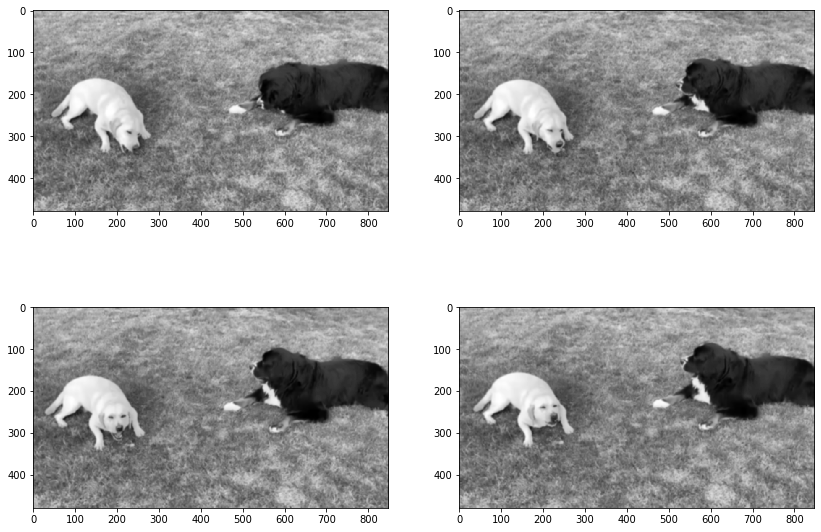

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14, 10))
ax1.imshow(frames_fil[0,:,:],cmap='gray')
ax2.imshow(frames_fil[30,:,:],cmap='gray')
ax3.imshow(frames_fil[60,:,:],cmap='gray')
ax4.imshow(frames_fil[90,:,:],cmap='gray')
plt.show()

In [9]:
gt, gr, gc = optical_flow.gradients(frames_fil) # gradients of pixels

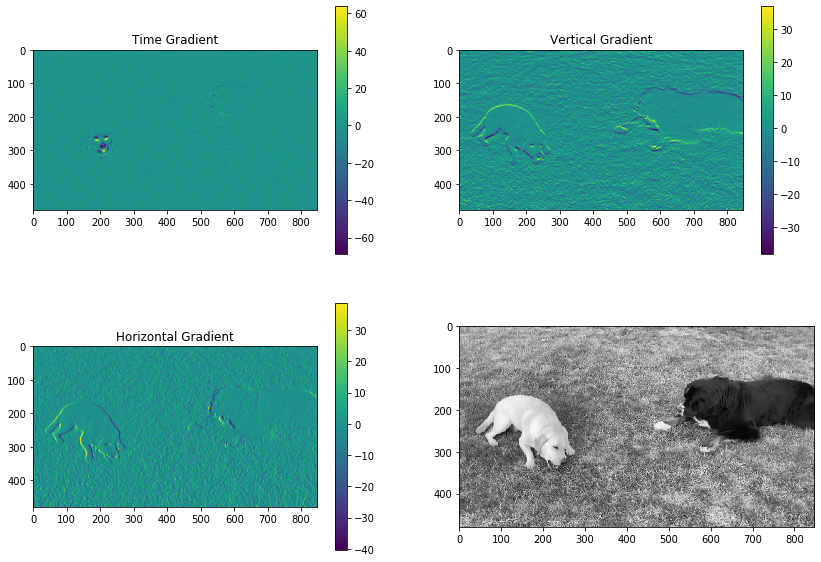

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14, 10))
plt1 = ax1.imshow(gt[55,:,:])
plt.colorbar(plt1, ax=ax1)
ax1.set_title('Time Gradient')
plt2 = ax2.imshow(gr[30,:,:])
plt.colorbar(plt2, ax=ax2)
ax2.set_title('Vertical Gradient')
plt3 = ax3.imshow(gc[20,:,:])
plt.colorbar(plt3, ax=ax3)
ax3.set_title('Horizontal Gradient')
ax4.imshow(frames[10,:,:],cmap='gray')
plt.show()

In [11]:
vc, vr = optical_flow.lucas_kanade(gt,gr,gc,4,4) # pixel velocities

Text(0.5, 1.0, 'Vertical Velocity')

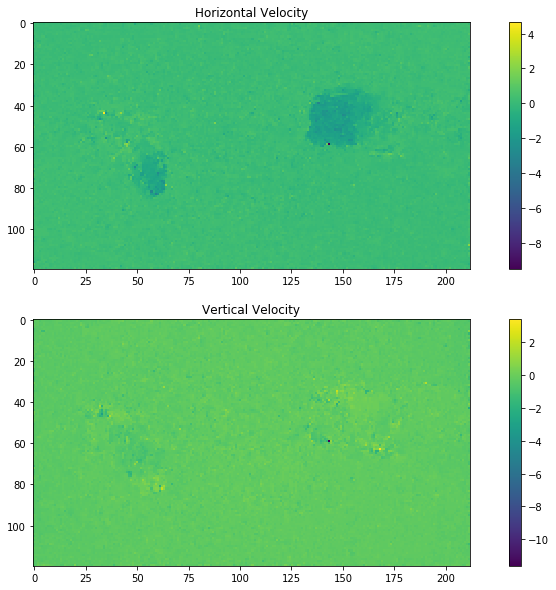

In [14]:
fig, ((ax1, ax2)) = plt.subplots(2,figsize=(14, 10))
plt1 = ax1.imshow(vc[1,:,:])
plt.colorbar(plt1, ax=ax1)
ax1.set_title('Horizontal Velocity')
plt2 = ax2.imshow(vr[1,:,:])
plt.colorbar(plt2, ax=ax2)
ax2.set_title('Vertical Velocity')

In [16]:
smooth_vc = optical_flow.medianfilt(vc, 3, 3) # median filt horizontal vel
smooth_vr = optical_flow.medianfilt(vr, 3, 3) # median filt vert vel

Text(0.5, 1.0, 'Vertical Velocity')

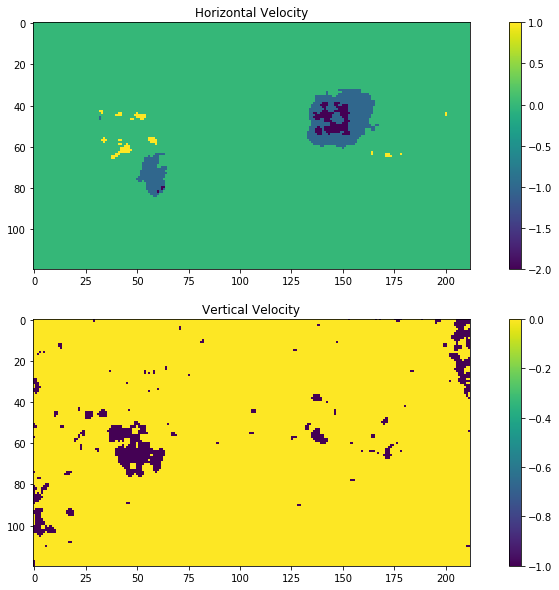

In [17]:
fig, ((ax1, ax2)) = plt.subplots(2,figsize=(14, 10))
plt1 = ax1.imshow(smooth_vc[1,:,:])
plt.colorbar(plt1, ax=ax1)
ax1.set_title('Horizontal Velocity')
plt2 = ax2.imshow(smooth_vr[1,:,:])
plt.colorbar(plt2, ax=ax2)
ax2.set_title('Vertical Velocity')

In [32]:
imp.reload(optical_flow)
highres_vc = optical_flow.interpolate(smooth_vc, 4)
highres_vr = optical_flow.interpolate(smooth_vr, 4)
print(highres_vc.shape)

(98, 480, 848)


Text(0.5, 1.0, 'Vertical Velocity')

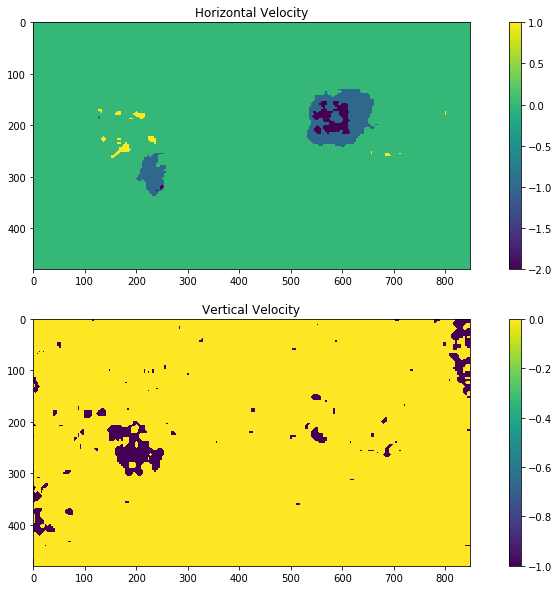

In [33]:
fig, ((ax1, ax2)) = plt.subplots(2,figsize=(14, 10))
plt1 = ax1.imshow(highres_vc[1,:,:])
plt.colorbar(plt1, ax=ax1)
ax1.set_title('Horizontal Velocity')
plt2 = ax2.imshow(highres_vr[1,:,:])
plt.colorbar(plt2, ax=ax2)
ax2.set_title('Vertical Velocity')

In [34]:
animated = optical_flow.velocity_fill(anim_frames, highres_vc, highres_vr, [0])


In [38]:
print(np.sum(animated[2]-animated[1]))

3298.0


In [299]:
imp.reload(image_utils)
imp.reload(optical_flow)
frame_nums = [i for i in range(0,34,3)]
#frame_nums = [0,30,60,90]
image_names = np.array(['data/orig/frame%d.jpg' % x for x in frame_nums])
images = image_utils.read_frames(image_names, num=len(image_names))
smoothed_im = optical_flow.smooth_video(images, 21, 1)
edges = image_utils.edge_detector(smoothed_im, thresh=None, mval=255)
#ax1.imshow(edges[0,:,:], cmap='gray')



image_utils.write_frames(edges)

	data//orig//anim_frame0_1.jpg
	data//orig//anim_frame3_1.jpg
	data//orig//anim_frame6_1.jpg
	data//orig//anim_frame9_1.jpg
	data//orig//anim_frame12_1.jpg
	data//orig//anim_frame15_1.jpg
	data//orig//anim_frame18_1.jpg
	data//orig//anim_frame21_1.jpg
	data//orig//anim_frame24_1.jpg
	data//orig//anim_frame27_1.jpg
	data//orig//anim_frame30_1.jpg
	data//orig//anim_frame33_1.jpg


In [114]:
np.shape(thresholded)[0]

4

In [300]:
imp.reload(image_utils)
image_utils.get_frames("cosmo.mp4")

c:\Users\amant\Documents\Projects\Optical Flow\data\orig\cosmo.mp4
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  Tr